Breast_cancer dataset: Number of instances: 4024, Class label = Status, Binary class problem. Imbalanced dataset, Class values: Alive(0) and dead(1)
Number of instances for Alive = 3408, No. of instances for Dead = 616, imbalanced ratio: 5:1 Class of interest dead which is the minority class. 
No missing values found in the dataset. 
stratify training test split. Training data 80% (3219 instances, among which 2726 is Alive(0) and  493 is Dead(1) )
                              Test data 20% (805 instances, among which 682 is Alive(0) and 123 is dead(1) )
One hot encoding has been used to pad categorical data

Importing important libaries 

In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [2]:
df = pd.read_csv("D:\Thesis\Dataset\Breast cancer categorical Kaggle dataset\Breast_Cancer.csv")

Display dataset

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [28]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Change the target value into 0 and 1 using label encoder, Alive =0, Dead = 1

In [4]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

Display Dataset

In [5]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0


In [5]:
print('Total Data:'+str(len(df)))

Total Data:4024


Assign target value in y variable

In [6]:
y = df['Status']

In [7]:
df['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

Create a new dataset which discard the target value

In [8]:
No_target=df.drop(['Status'], axis=1)

Create a new dataset which only hold the categorical values

In [9]:
cat_df = No_target.select_dtypes(include=['object'])

Apply one hot encoding on the categorical dataset

In [10]:
onehot = OneHotEncoder(cols=cat_df.columns.tolist()).fit_transform(cat_df)

In [11]:
No_target.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
dtype: object

Create a dataset which only hold the numerical values

In [12]:
num_df = No_target.select_dtypes(include=['int64'])

one_hot_df = pd.concat([num_df, onehot], axis=1)Merge the numerical and categorical value dataset into a new dataset

In [13]:
Merge_df = pd.concat([num_df, onehot], axis=1)

In [14]:
Merge_df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_1,Race_2,Race_3,Marital Status_1,Marital Status_2,...,Grade_1,Grade_2,Grade_3,Grade_4,A Stage_1,A Stage_2,Estrogen Status_1,Estrogen Status_2,Progesterone Status_1,Progesterone Status_2
0,68,4,24,1,60,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
1,50,35,14,5,62,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
2,58,63,14,7,75,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,58,18,2,1,84,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4,47,41,3,1,50,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


Split the dataset into training and test set. Two important link for train test split https://www.kaggle.com/code/ojoabimbola/breast-cancer-accu-0-99-0-90 and https://www.kaggle.com/code/jiaowoguanren/breast-cancer-tensorflow-resmlp

In [15]:
(X_train, X_test, y_train, y_test)=train_test_split(Merge_df,y,test_size=0.2, stratify=y)
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Test set data len:'+str(len(X_test)))
print('Class distribution'+ str(Counter(y_test)))

Train data len:3219
Class distributionCounter({0: 2726, 1: 493})
Test set data len:805
Class distributionCounter({0: 682, 1: 123})


Feature Selection

In [17]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [18]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 14.659096
Feature 1: 850.014288
Feature 2: 21.873525
Feature 3: 1485.277925
Feature 4: 5993.193209
Feature 5: 0.512006
Feature 6: 20.922138
Feature 7: 4.021212
Feature 8: 5.601705
Feature 9: 1.133983
Feature 10: 1.224111
Feature 11: 9.484409
Feature 12: 10.513141
Feature 13: 27.287016
Feature 14: 2.181016
Feature 15: 12.428941
Feature 16: 45.034507
Feature 17: 51.032404
Feature 18: 9.335082
Feature 19: 167.640306
Feature 20: 46.638949
Feature 21: 1.276569
Feature 22: 167.640306
Feature 23: 8.832149
Feature 24: 10.731865
Feature 25: 51.766011
Feature 26: 11.010064
Feature 27: 16.180921
Feature 28: 11.367710
Feature 29: 51.766011
Feature 30: 11.010064
Feature 31: 16.180921
Feature 32: 11.367710
Feature 33: 0.928991
Feature 34: 35.539577
Feature 35: 9.218108
Feature 36: 128.157306
Feature 37: 20.555553
Feature 38: 99.097837


Use Naive bayes classifier for classification(Bernoulli Naive Bayes classifier) - It only takes binary values. There may be multiple features, but each is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors.

In [40]:
Bernoulli_classifer = BernoulliNB()
# training the model
Bernoulli_classifer.fit(X_train, y_train)
# testing the model
y_pred = Bernoulli_classifer.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       682
           1       0.37      0.44      0.40       123

    accuracy                           0.80       805
   macro avg       0.63      0.65      0.64       805
weighted avg       0.82      0.80      0.81       805



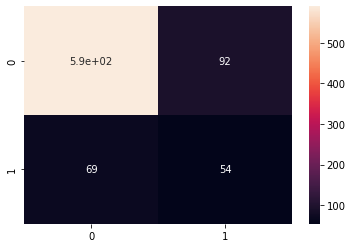

In [43]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Note: 5.9e+02 = 5.9*10*10 = 590

Gaussian Naive Bayes classifier - is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. To build a simple model using Gaussian Naive Bayes, we assume the data is characterized by a Gaussian distribution with no covariance (independent dimensions) between the parameters. This model may be fit simply by calculating the mean and standard deviation of the points within each label.

In [44]:
# create a Gaussian Classifier
Gauss_classifer = GaussianNB()
# training the model
Gauss_classifer.fit(X_train, y_train)
# testing the model
y_pred = Gauss_classifer.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       682
           1       0.39      0.48      0.43       123

    accuracy                           0.80       805
   macro avg       0.64      0.67      0.65       805
weighted avg       0.82      0.80      0.81       805



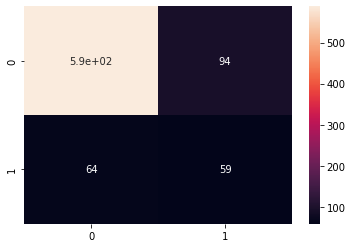

In [45]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Logistic regression classification

In [46]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       682
           1       0.85      0.43      0.57       123

    accuracy                           0.90       805
   macro avg       0.88      0.71      0.76       805
weighted avg       0.90      0.90      0.89       805



C:\Users\cse_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


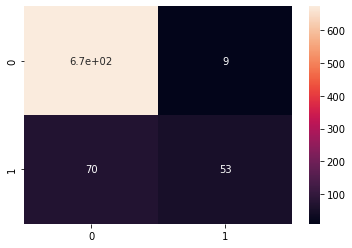

In [47]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Note: 6.7e+02 = 6.7*10*10 = 670

Random Forest Classification

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       682
           1       0.82      0.50      0.62       123

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



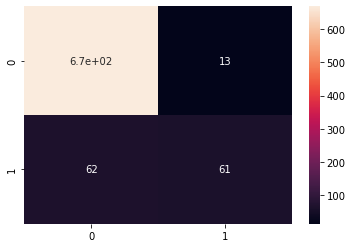

In [49]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Multilayer Perceptron classification

In [50]:
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       682
           1       0.83      0.49      0.62       123

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



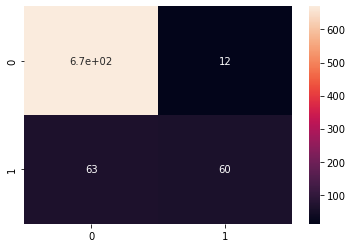

In [51]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Bagging classification

In [52]:
B_model = BaggingClassifier()
B_model.fit(X_train, y_train)
y_pred = B_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       682
           1       0.77      0.49      0.60       123

    accuracy                           0.90       805
   macro avg       0.84      0.73      0.77       805
weighted avg       0.89      0.90      0.89       805



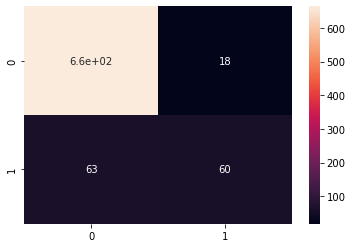

In [53]:
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Note: 6.6e+02 = 6.6*10*10= 660